In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_names = ['../data/北京apm.csv', '../data/王府中環.csv', '../data/王府井百货.csv', '../data/东方新天地.csv']
df1 = pd.read_csv(file_names[0], header=0)
df2 = pd.read_csv(file_names[1], header=0)
df3 = pd.read_csv(file_names[2], header=0)
df4 = pd.read_csv(file_names[3], header=0)

# For Store1 : 北京apm

### 1.  Mean of the Score Data

In [3]:
facs_mean = df1['facs_score'].mean()
envr_mean = df1['envr_score'].mean()
serv_mean = df1['serv_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv'])

print(df)

      Score Mean
facs        4.56
envr        4.58
serv        4.51


### 2. Distribution of the Score Data

In [4]:
facs_score_counts = df1['facs_score'].value_counts().sort_index()
envr_score_counts = df1['envr_score'].value_counts().sort_index()
serv_score_counts = df1['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,58,55,66
1.0,1,3,10
1.5,10,7,11
2.0,6,5,8
2.5,46,37,57
3.0,49,39,47
3.5,228,235,273
4.0,547,544,598
4.5,1166,1147,1158
5.0,2454,2493,2337


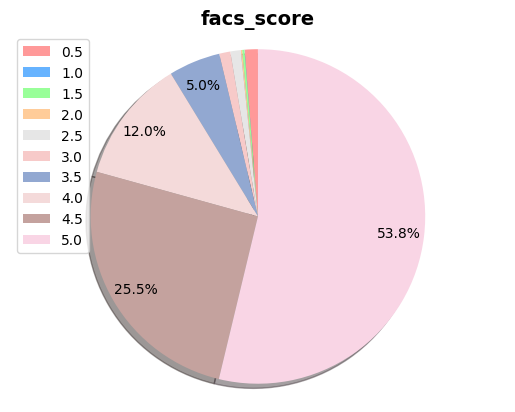

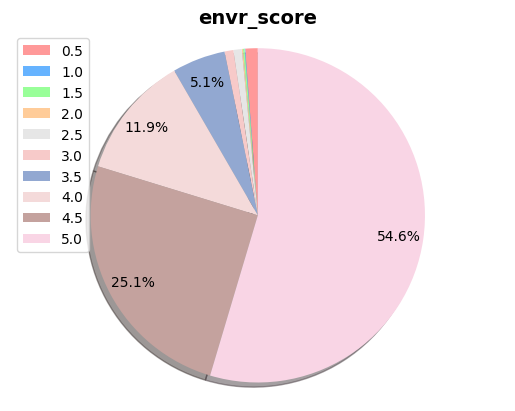

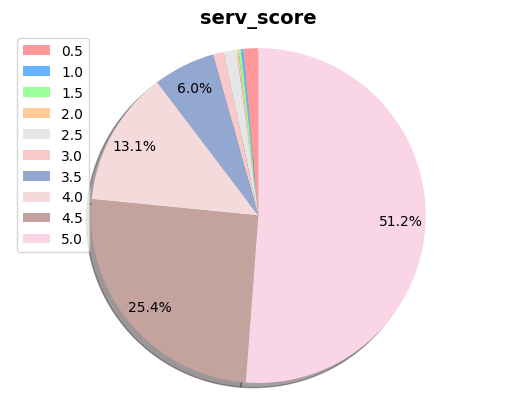

In [5]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [6]:
import pandas as pd

df1['time'] = pd.to_datetime(df1['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df1['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

   Year  Count
0  2020   1992
1  2021   1158
2  2022   1044
3  2023    371


### 4. Simple Splitting and Wordcloud for Review Text 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/st/jr2134cd02575p7pnq8xy5440000gn/T/jieba.cache
Loading model cost 0.284 seconds.
Prefix dict has been built successfully.


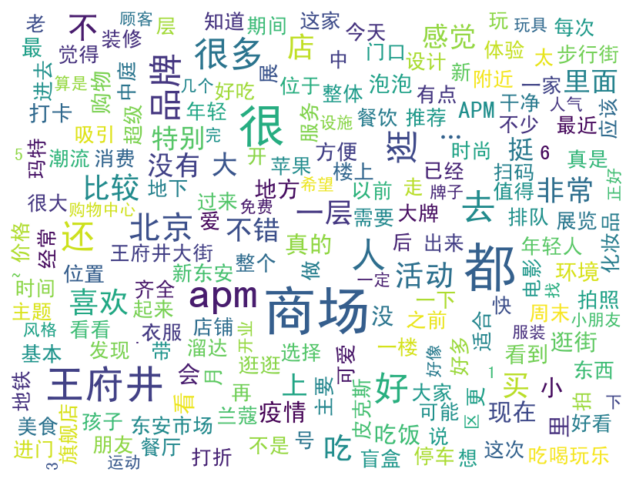

In [7]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load stopwords
stopwords = set(pd.read_csv('stopwords/hit_stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df1)):
    segs = jieba.lcut(df1.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_apm_01.png")

# For Store2 : 王府中環

### 1.  Mean of the Score Data

In [8]:
facs_mean = df2['facs_score'].mean()
envr_mean = df2['envr_score'].mean()
serv_mean = df2['serv_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv'])

print(df)

      Score Mean
facs        4.67
envr        4.69
serv        4.56


### 2. Distribution of the Score Data

In [9]:
facs_score_counts = df2['facs_score'].value_counts().sort_index()
envr_score_counts = df2['envr_score'].value_counts().sort_index()
serv_score_counts = df2['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,26,27,53
1.0,4,4,4
1.5,2,1,6
2.0,3,1,10
2.5,18,11,20
3.0,11,12,26
3.5,109,107,154
4.0,327,301,429
4.5,889,853,904
5.0,2074,2146,1857


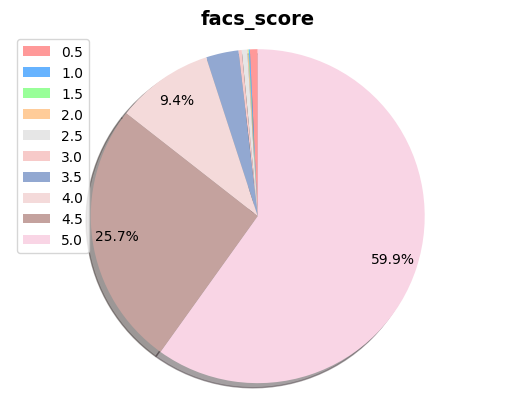

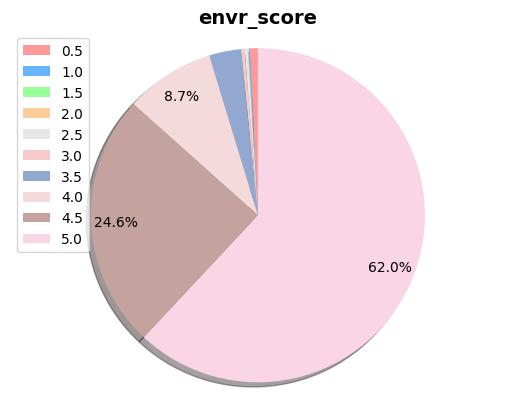

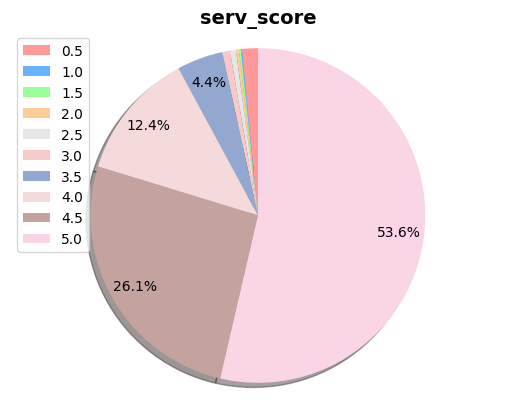

In [10]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [11]:
import pandas as pd

df2['time'] = pd.to_datetime(df2['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df2['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

     Year  Count
0  2020.0   1921
1  2021.0    960
2  2022.0    413
3  2023.0    169


### 4. Simple Splitting and Wordcloud for Review Text 

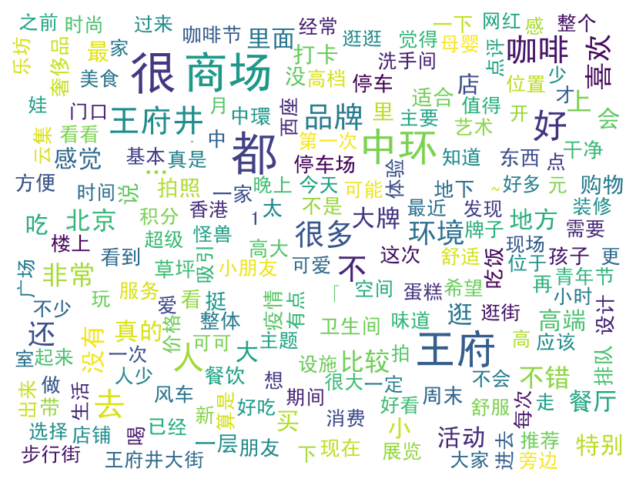

In [12]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load stopwords
stopwords = set(pd.read_csv('stopwords/hit_stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df2)):
    segs = jieba.lcut(df2.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_zhonghuan_01.png")

# For Store3 : 王府井百货

### 1.  Mean of the Score Data

In [13]:
facs_mean = df3['facs_score'].mean()
envr_mean = df3['envr_score'].mean()
serv_mean = df3['serv_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv'])

print(df)

      Score Mean
facs        4.53
envr        4.55
serv        4.45


### 2. Distribution of the Score Data

In [14]:
facs_score_counts = df3['facs_score'].value_counts().sort_index()
envr_score_counts = df3['envr_score'].value_counts().sort_index()
serv_score_counts = df3['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,14,15,33
1.0,1,1,3
1.5,2,1,7
2.0,1,2,3
2.5,21,16,17
3.0,21,21,30
3.5,94,93,114
4.0,302,291,313
4.5,555,539,537
5.0,907,939,861


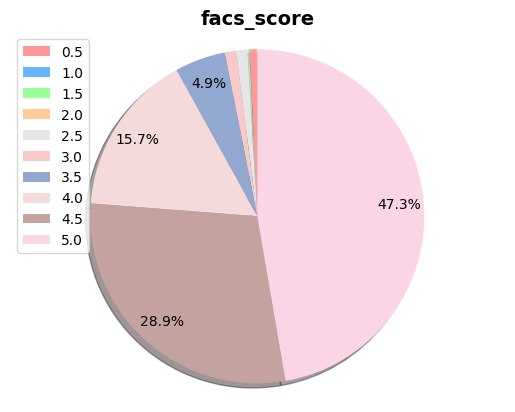

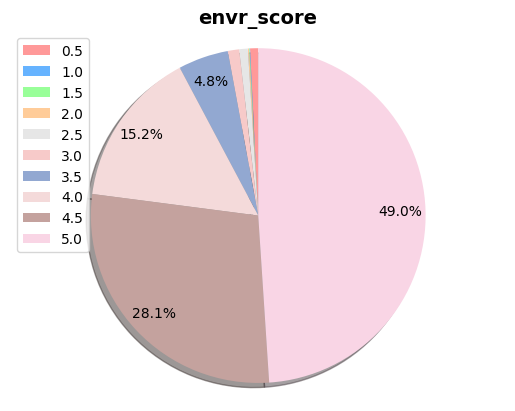

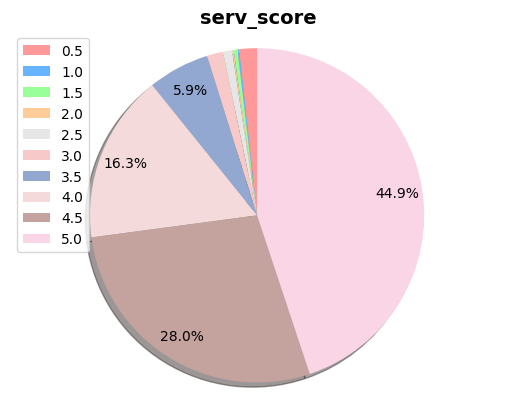

In [15]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [16]:
import pandas as pd

df3['time'] = pd.to_datetime(df3['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df3['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

     Year  Count
0  2020.0   1078
1  2021.0    438
2  2022.0    260
3  2023.0    142


### 4. Simple Splitting and Wordcloud for Review Text 

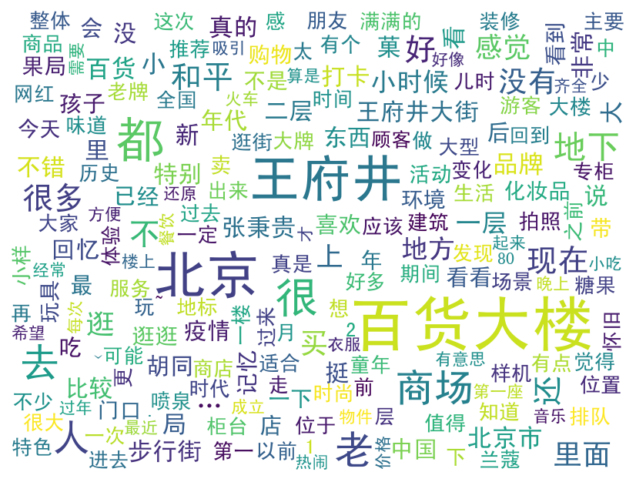

In [17]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load stopwords
stopwords = set(pd.read_csv('stopwords/hit_stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df3)):
    segs = jieba.lcut(df3.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_baihuo_01.png")

# For Store4 : 东方新天地

### 1.  Mean of the Score Data

In [18]:
facs_mean = df4['facs_score'].mean()
envr_mean = df4['envr_score'].mean()
serv_mean = df4['serv_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv'])

print(df)

      Score Mean
facs        4.41
envr        4.45
serv        4.30


### 2. Distribution of the Score Data

In [19]:
facs_score_counts = df4['facs_score'].value_counts().sort_index()
envr_score_counts = df4['envr_score'].value_counts().sort_index()
serv_score_counts = df4['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,31,27,57
1.0,4,2,3
1.5,3,1,8
2.0,3,2,1
2.5,17,17,13
3.0,21,15,22
3.5,79,86,94
4.0,222,217,239
4.5,402,389,396
5.0,579,605,528


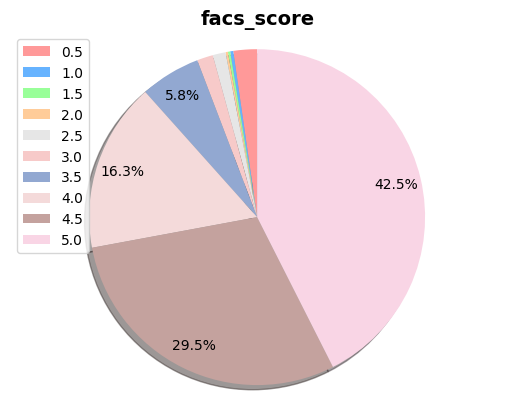

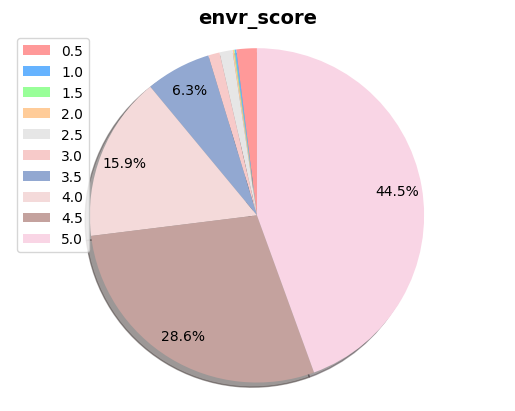

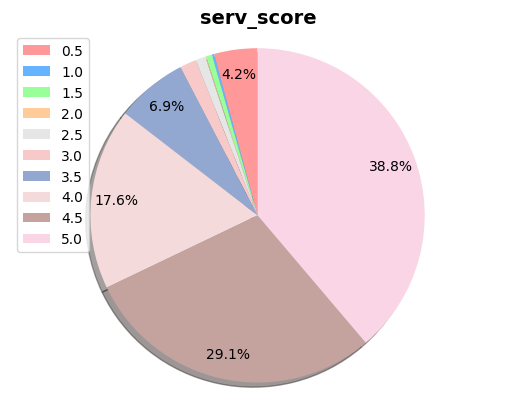

In [20]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [21]:
import pandas as pd

df4['time'] = pd.to_datetime(df4['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df4['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

     Year  Count
0  2020.0    694
1  2021.0    355
2  2022.0    188
3  2023.0    124


### 4. Simple Splitting and Wordcloud for Review Text 

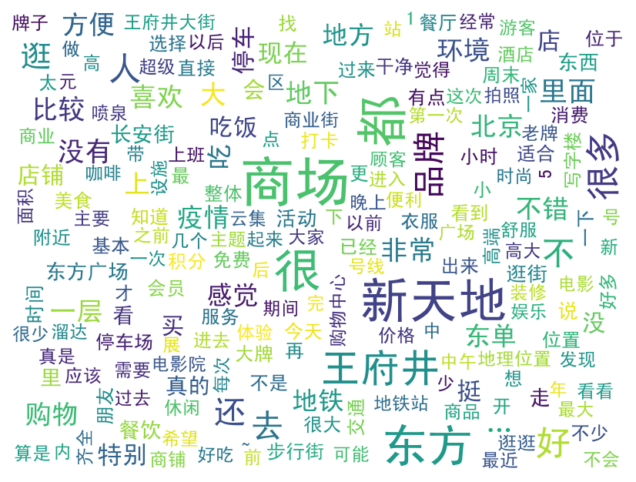

In [22]:
import jieba
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load stopwords
stopwords = set(pd.read_csv('stopwords/hit_stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df4)):
    segs = jieba.lcut(df4.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_xintiandi_01.png")